In [1]:
import numpy as np
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [2]:
def generate_sample(a1, a2, std, n, m, rho=0):
    cov_matrix = np.asarray([[std ** 2, rho],
                             [rho, std ** 2]])
    xy = np.random.multivariate_normal([a1, a2], cov_matrix, max(n, m))
    
    return xy[:n, 0], xy[:m, 1]

In [3]:
def count_t(x, y, std):
    n = x.shape[0]
    m = y.shape[0]
    S1 = np.mean((x - np.mean(x))**2) * n / (n - 1)
    S2 = np.mean((y - np.mean(y))**2) * m / (m - 1)
    t = (np.mean(x) - np.mean(y)) / np.sqrt(S1/n + S2/m)
    return t

In [4]:
def count_u(x, y):
    n = x.shape[0]
    m = y.shape[0]
    union_sample = [c for c in x] + [c for c in y]
    indexes = [0] * n + [1] * m
    union_sample, indexes = zip(*sorted(zip(union_sample, indexes)))
    
    T0, T1 = 0, 0
    for i in range(len(union_sample)):
        if indexes[i] == 0:
            T0 += i + 1
        else:
            T1 += i + 1
    k = n if (T0 > T1) else m
    
    u = n * m + (k * (k + 1)) / 2 - max(T0, T1)
    return u

In [5]:
def check_H0_t(t, alpha):
    z1 = st.norm.ppf(alpha / 2)
    z2 = st.norm.ppf(1 - alpha / 2)
    if z1 <= t <= z2:
        return True
    else:
        return False

In [6]:
def check_H0_u(u, alpha, n, m):
    z1 = st.norm.ppf(alpha / 2)
    z2 = st.norm.ppf(1 - alpha / 2)
    u_normed = (u - n * m / 2) / np.sqrt(n * m * (n + m + 1) / 12)
    
    if z1 <= u_normed <= z2:
        return True
    else:
        return False

In [7]:
def show_power(a1, a2, std, n, m, n_iter=200):
    power_u_list = []
    power_t_list = []
    for alpha in np.arange(0, 1.01, 0.05):
        n_errors_t = 0
        n_errors_u = 0
        for _ in range(n_iter):
            x, y = generate_sample(a1, a2, std, n, m)
            t = count_t(x, y, std)
            u = count_u(x, y)
            if check_H0_t(t, alpha):
                n_errors_t += 1
            if check_H0_u(u, alpha, x.shape[0], y.shape[0]):
                n_errors_u += 1
                
        power_t_list.append(1 - n_errors_t / n_iter)
        power_u_list.append(1 - n_errors_u / n_iter)

    sns.plt.plot(np.arange(0, 1.01, 0.05), power_t_list, c='violet')
    sns.plt.plot(np.arange(0, 1.01, 0.05), power_u_list)
    sns.plt.legend(['зависимость мощности t-теста\n от уровня значимости',
                    'зависимость мощности критерия Манна-Уитни\n от уровня значимости'],  bbox_to_anchor=(1, 1))
    sns.plt.xlabel('уровень значимости')
    sns.plt.ylabel('мощность')
    sns.plt.show()

Для проверок мощности критериев для каждого значения $\alpha$ от $0$ до $1$ с шагом $0.05$ были $200$ раз сгенерированы выборки из распределений $\mathcal{N}(0, 1)$ и $\mathcal{N}(0.5, 1)$ размером $30$ и $50$ соответственно. Ниже на графике зависимости мощности критериев от уровня значимости видно, что $t$-критерий является более мощным.

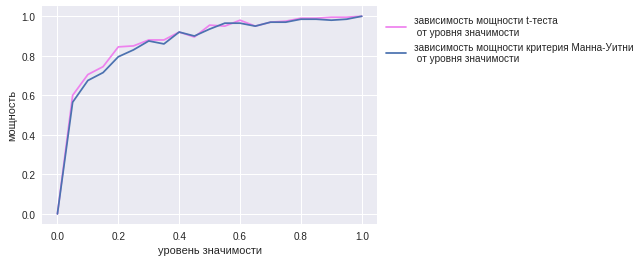

In [8]:
show_power(0, 0.5, 1, 30, 50)

In [9]:
def compare(a1, a2, std, n):
    sp_list = []
    p_list = []
    for rho in np.arange(0, 1, 0.02):
        x, y = generate_sample(a1, a2, std, n, n, rho)
        sp = st.spearmanr(x, y)[0]
        p = st.pearsonr(x, y)[0]
        sp_list.append(sp)
        p_list.append(p)
        
    sns.plt.scatter(sp_list, p_list, marker='.')
    sns.plt.title("Коэффициенты корреляции Спирмена и Пирсона\n"
                  "для выборок с коэффициентами корреляции от 0 до 1")
    sns.plt.xlabel('коэффициент корреляции Спирмена')
    sns.plt.ylabel('коэффициент корреляции Пирсона')

Были сгенерированы выборки из распределений $\mathcal{N}(0, 1)$ и $\mathcal{N}(3, 1)$ (каждая размера $400$) с коэффициентом корреляции, меняющимся от $0$ до $1$. Для каждой пары выборок был подсчитан коэффициент корреляции Спирмена (ось x) и Пирсона (ось у). Как видно по графику, они почти всегда совпадают

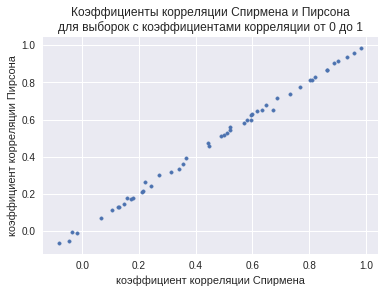

In [10]:
compare(0, 3, 1, 400)